In [32]:
print("Prediksi Penyebaran Penyakit Demam Berdarah Dengue (DBD) dengan Metode K-Nearest Neighbor Di Kota Semarang")


Prediksi Penyebaran Penyakit Demam Berdarah Dengue (DBD) dengan Metode K-Nearest Neighbor Di Kota Semarang


In [33]:
print ("Daniel Nomolas Wicaksono : A11.2022.14448")

Daniel Nomolas Wicaksono : A11.2022.14448


In [ ]:
#Demam Berdarah Dengue (DBD) adalah kondisi penyakit yang diakibatkan oleh infeksi 
#virus dengue. Penyakit ini dipicu oleh salah satu dari empat jenis virus dalam keluarga flavivirus. 
#Karena termasuk dalam kategori penyakit berbahaya, diperlukan upaya prediksi untuk 
#mengidentifikasi bulan-bulan  yang rentan terhadap kasus DBD. Prediksi ini bertujuan untuk 
#dengan cepat menentukan bulan-bulan dengan tingkat penyebaran tertinggi hingga terendah, 
#sehingga langkah-langkah pencegahan yang sesuai dapat diambil untuk mengurangi dampak dari 
#wabah DBD tersebut.

#Pada penelitian ini kita adapun variabel yang kita pakai yaitu curah hujan pada kota semarang menurut bulan, Jumlah Penderita DBD menurut bulan dan kelembaban kota semarang menurut bulan.
# Data tersebut kita dapat dari Badan Pusat Statistik Kota Semarang dan data.go.id yang merupakan portal data Indonesia.


# Model yang kita pakai disini ada K-Nearest Neighbor. 
#K-Nearest Neighbor adalah metode yang melakukan klasifikasi berdasarkan data traning atau data pembelajaran dilihat dari jarak yang palik dekat dengan objek berdarsarkan nilai K.
#Untuk menentukan jarak Terdekat tersebut data dibagi menjadi 2 yaitu data training dan data testing setelah diperoleh data training dan data testing kemudian di hitung jarak masing-masing data testing terhadap data training

In [39]:
#Berikut adalah bagan urutan K-Nearest Neighbor

#1. Pengumpulan dan Persiapan Data
#2. Eksplorasi dan Pra-pemrosesan data 
#  -  Encode Label
#  - Pemilihan features dan target 
#  - Cek outlier dan memperbaiki file
#3. Pembagian Data (Testing dan Training)
#4. Membuat dan Melatih model
#5. Membuat prediksi dan evaluasi model
#6. Cek akurasi menggunakan matrix 
#7. Test Model dengan melakukan contoh bulan depan

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  # Gunakan KNeighborsRegressor untuk regresi
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Membaca data
de = pd.read_csv('DBD.csv')
#memasukan table pertama yang isinya raw data belom diedit sama sekali.

print("Jumlah nilai yang hilang pada setiap kolom:\n", de.isnull().sum())
#cek apakah ada data yang kosong atau tidak

Jumlah nilai yang hilang pada setiap kolom:
 Bulan                  0
Penderita Laki-laki    0
Penderita Perempuan    0
Totalpenderita         0
Nilai                  0
CurahHujan             0
Kelembaban             0
dtype: int64


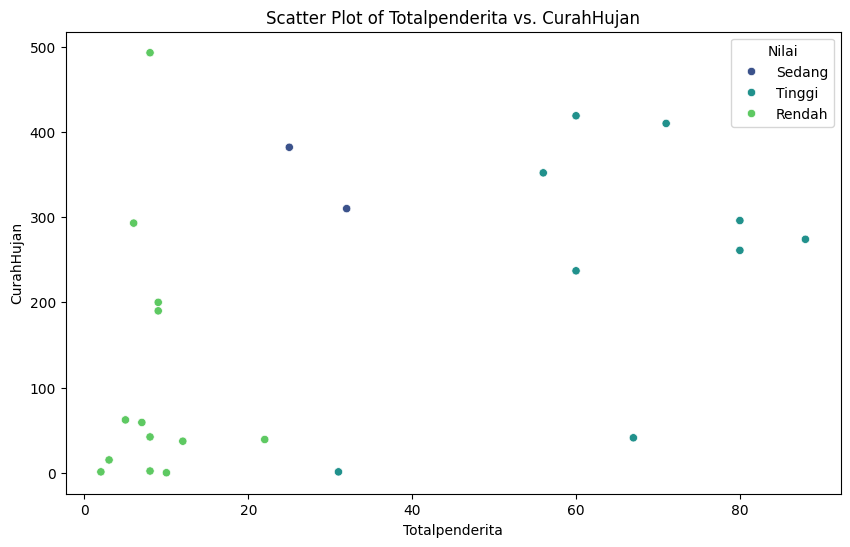

In [137]:
#tidak ada data yang kosong
# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de, x='Totalpenderita', y='CurahHujan', hue='Nilai', palette='viridis')
plt.title('Scatter Plot of Totalpenderita vs. CurahHujan')
plt.show()


In [129]:
#disini kita lihat terdapat beberapa outlier, maka kita akan coba rapikan dengan cara menghapus data yang termasuk outlier

In [181]:
df = pd.read_csv('DBD2.csv')

#input data dari table kedua yang sudah diedit dengan cara mengdelete outlier data

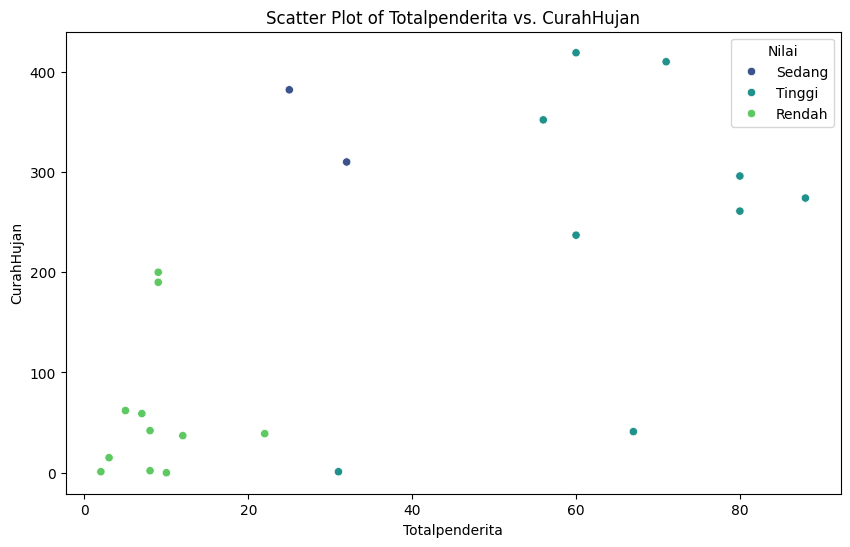

In [182]:
# Scatter plot data table ke dua
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Totalpenderita', y='CurahHujan', hue='Nilai', palette='viridis')
plt.title('Scatter Plot of Totalpenderita vs. CurahHujan')
plt.show()

In [ ]:
#bisa dilihat disini data lebih rapi, dan memiliki pola yang lebih jelas


In [183]:
print("Jumlah nilai yang hilang pada setiap kolom:\n", df.isnull().sum())

#cek sekali lagi apakah ada yang null

Jumlah nilai yang hilang pada setiap kolom:
 Bulan                  0
Penderita Laki-laki    0
Penderita Perempuan    0
Totalpenderita         0
Nilai                  0
CurahHujan             0
Kelembaban             0
Kepadatan              0
dtype: int64


In [207]:
#tidak ada yang null


#Penjelasan Dataset yang kita pakai
# Bulan,Urutan bulan dalam angka, INT , Prediktor
# Total Penderita,Jumlah total penderita dbd satuan manusia, INT,Class
# CurahHujan,Satuan mm, INT , Prediktor
# Nilai, Category ( Total<25=Rendah, 25<Total<50 = Sedang, Total>50 = Tinggi)
# Kelemababan,satuan dalam %, INT , prediktor

# Memilih  fitur dan target
features = df[[ 'CurahHujan', 'Kelembaban','Bulan']]
target = df['Totalpenderita']


# Standarisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [218]:
#Setelah memastikan data tidak null dan cek outlier dan update table, kita melanjutkan ke proses modeling

# Membagi data menjadi training dan testing set


X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)



In [226]:

# Membuat dan melatih model kNN
#menggunakan kneighborsregressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

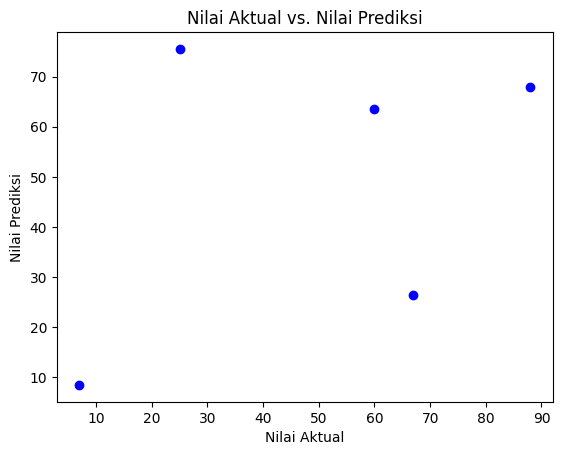

In [227]:

# Plot prediksi terhadap data yang ada
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Aktual vs. Nilai Prediksi')
plt.show()

In [228]:
# Membuat prediksi dan mengevaluasi model

y_pred = knn.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 890.1777777777779
R^2 Score: -0.03384021390153524


In [229]:
#disini nilai performa model masih sangatlah rendah. 
#Hipotesis nya adalah :
# 1. Data kurang banyak, dikarenakan Data yang digunakan merupakan data dengan rentan dari 2019-2020 saja. Data yang ada di internet sangatlah sedikit.
# 2. Kurangnya variabel, harus melakukan research lagi tentang variabel yang berhubungan dengan DBD

#Berikutnya kita akan mencoba prediksi 

In [329]:
def predict_next_month_data(data):
    df = pd.DataFrame(data)

    # Standarisasi data fitur bulan depan
    scaled_data = scaler.transform(df)

    # Melakukan prediksi
    prediksi_nilai = knn.predict(scaled_data)
    
    return prediksi_nilai

# Contoh penggunaan
next_month_data = [
    {'CurahHujan': 300, 'Kelembaban': 90, 'Bulan': 1},
    {'CurahHujan': 400, 'Kelembaban': 90, 'Bulan': 1},
    {'CurahHujan': 200, 'Kelembaban': 90, 'Bulan': 1},
    {'CurahHujan': 300, 'Kelembaban': 80, 'Bulan': 1},
    {'CurahHujan': 300, 'Kelembaban': 70, 'Bulan': 1},
    {'CurahHujan': 300, 'Kelembaban': 90, 'Bulan': 5},
    {'CurahHujan': 300, 'Kelembaban': 90, 'Bulan': 10}
]

predictions = predict_next_month_data(next_month_data)
print("Prediksi nilai untuk bulan depan:", predictions)

Prediksi nilai untuk bulan depan: [70.33333333 69.         73.33333333 73.33333333 64.         69.
 16.66666667]


In [331]:
#Hasil :
 #1. Pada data ke 1-3 kita hanya menganti nilai curah hujan, dengan nilai : 200,300,400. Tetapi bisa kita lihat bahwa hasil nya tidak memberikan pola berbalik lurus maupun terbalik. 
    #Pada curah hujan 300 kita mendapatkan korban total dbd ada di 70.33
    #Pada curah hujan 400, korban total menurun menjadi 69
    #Namun pada curah hujan 200, korban total malah menaik menjadi 73.33 
    #(variabel kontrol : kelembaban, bulan)
    #Jadi Bisa diliat dari hasil ini, curah hujan tidak memiliki pola tertentu
 #2. Pada data 1,4,5. disini kita hanya menganti nilai kelembaban, dengan nilai : 90,80,70
    #Pada kelembaban 90, kita mendapatkan korban total dbd ada di 70.33
    #Pada kelembaban 80,korban total dbd naik di 73.33
    #Pada kelembaban 70, korban turun ke 64
    #(Variabel kontrol: CurahHujan, Bulan)
    #Jadi pada perubahan variabel kelembaban, hasilnya bersifat sama seperti perubahan variabel curahhujan tidak menentu

 #3 Pada data 1,6,7 kita mengganti bulan
    #Pada bulan 1, Total korban dbd ada di 70.33
    #Pada bulan 5, korban dbd menurun  ke 64
    #Pada bulan 10, korban dbd menurun drastis ke 16.67
    #(Variabel kontrol : Curah Hujan, Kelembaban)
    # Berbeda dengan hasil dari variabel bebas CurahHujan dan Kelembaban, Hasil dari variabel bebas Bulan memiliki sifat berbanding terbalik. Dimana bulan bertambah maka totalkorban menurun



#Kesimpulan

#1.Pada model ini memberikan hasil bahwa yang memiliki hasil kompeten adalah dari data pergantian bulan, dimana bisa terlihat bila bulan semakin menaik maka total korban menurun, sehingga bisa disimpulkan bahwa
    #kita harus berhati-hati pada bulan awal tahun karena memiliki totalkorban DBD yang banyak. 
#2.Model ini masih sangat jauh dari sempurna dengan tingkat perfoma R^2 Score: -0.03384021390153524 hal ini dikarenakan jumlah dataset yang dipakai masih sedikit(rentan data 2019-2020), sehingga masih terlalu banyak outlier atau data yang acak ketimbang data yang berpola.
    #maka dari itu kedepannya penulis akan mencoba mengumpulkan dataset lebih banyak sehingga perfoma model meningkat.
#3.Kita juga bisa menganti model yang dipakai untuk permasalahan ini. Contohnya yang ingin digunakan penulis adalah Model SimpleLinear
